# Introduction

    Transcriptional motifs (TMs) are recurring wiring patterns in the gene regulatory networks (GRN) of bacteria, yeast, and higher organsims.  Motifs play roles in the information processing roles of the GRN.  One common motif found in E. coli and yeast is the coherent feed-forward loop (cFFL, Figure 1) with AND gate logic.  In this motif, an input signal X activates the transcription factor X (TFX).  Once TFX is active, it then activates the transcription (and subsequent translation) of TFY.  Together TFX and TXY are necessary for the production of gene product Z.  A cFFL with OR gate logic exists, the only difference being either TFX or TFY is able to induce the expression of gene product Z.
    In the human pathogen Vibrio cholerae, a pair of transcription factors, VpsR and VpsT, have been proposed to regulate genes utilizing various transcriptional motifs including cFFLs where the input signal X is the second messenger cyclic diguanylate (CdG).  In the absence of CdG, VpsR is present but inactive, whereas VpsT is absent.  Once CdG reaches a threshold concentration, VpsR is active, leading to the induction of VpsT. Together, the two transcirption factors activate a subset of genes including the gene tag (Figure 2).  Tag is a DNA repair enzyme involved in the removal of unwanted methyl groups from DNA that inhibit chromosome replication and subsequently cause cell death.  Thus, when the signal input (CdG) is high, cells express tag and are more tolerant to methylation stress.  
  

Figure 1 - Coherent feed-forward loop with AND gate logic.


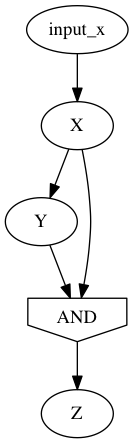

In [342]:
##Using image display to import image into ipython notebook.
from IPython.display import Image
FFL = Image('FFL.png')
print "Figure 1 - Coherent feed-forward loop with AND gate logic."
FFL 

##Graph was created in graphviz.  This separate software allows the generation of more complex graphs than networkx can
#supply, however they are not directly inserted into ipython notebook.  I only use them in the first two figures because
#(and not in the later figures), because I'm not sure you will be able to see them on your computer. 


Figure 2 - Model of tag regulation by CdG, VpsR, and VpsT.


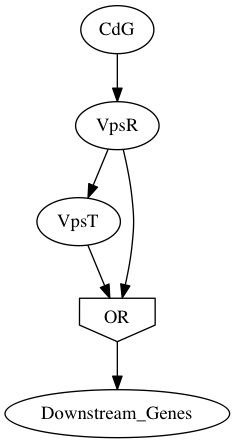

In [343]:
## Model of tag regulation by CdG, VpsR, and VpsT
FFL_cdG=Image('FFL-CdG.png')
print 'Figure 2 - Model of tag regulation by CdG, VpsR, and VpsT.'
FFL_cdG

#Graph was created in graphviz

# Project Goals

    My wet-lab work on this project suggests a cFFL with synergistic OR gate logic regulates tag expression, meaning either VpsR (TFX) or VpsT (TFX) alone can induce tag expression to some extent, however, when both are present, tag expression is greater due to the additive effects of both transcription factors.  I was interested in why this particular motif and logic gate was utilized over another logic gate, the AND gate.  Thus, the goal of this project was to model tag gene expression using both the synergistic OR gate and the AND gate logic.  Further, I wanted to determine which logic gate provided a greater benefit to a population of growing cells when the methylating agent MMS was present, with the hypothesis that the synergistic OR gate logic would provide robust levels of tag and greater MMS tolerance than the AND gate logic.
    



# Methods

Ordinary differential equations (ODEs):
    Gene expression and microbial growth on a limiting substrate were modeled using ODEs adapated from Mangan and Alon, 2003. PNAS and Stanescu et al., 2009. Mathematical and Computer Modeling, respecively.  
    
Assumptions:
    Gene expression and growth:
        - 'Activation of transcription' includes instantanous transcription and translation of gene to gene product.
        - There is no active degradation of tag and vpsT - their degradation is constant throughout the experiment.
        - The only factors affecting growth are growth substrate and MMS concentrations.
        - In the model, tag activity decreases the active concentration of MMS.  This is essentially what is occuring in vivo, however there are multiple in between steps that not included in the model for simplicity.
        - The expression level of tag and vpsT is that of the whole population, not a single cell.
Disclaimers:
    The ODEINT function was only used to solve the ODEs for modeling growth and not for modeling gene expression.  This is because I wanted to directly control which value for the expression levels went into the list tracking expression ( for example, if a value wasn't above a threshold, a 0 got appended to a list instead of that value).  It probably could have been done using the ODEINT function and math, but I found this option easier. 

In [344]:
### Calling other libraries 

#Plotting
%pylab inline
from pandas import *

#Creating and drawing graphs
import networkx as nx

#Solving a series of differential equations
from scipy.integrate import odeint




###Functions used in the program


##These functions describe the effect of gene i on gene j (i_activate_j).  The effect could be activation or repression, 
#depending on the function.
def X_activate_Y(beta_Y,x,K_xy,H):
    activate=(((beta_Y)*(x**H))/((x**H)+(K_xy**H)))
    return activate
##returns the change in gene j expression level per iteration
print X_activate_Y(1.0,1.0,0.3,4.0)

def Y_activate_Z(beta_Z,Y,K_yz,H):
    activate=(((beta_Z)*(Y**H))/((Y**H)+(K_yz**H)))
    return activate
print Y_activate_Z(1.0,1.0,0.3,4.0)

def X_activate_Z(beta_Z,x,K_xz,H):
    activate=(((beta_Z)*(x**H)/((x**H)+(K_xz**H))))
    return activate
print X_activate_Z(1.0,1.0,0.3,4.0)



##gene turnover function

def y_TO(turnover,Y):
    TurnOver=(turnover*Y)
    return TurnOver
##returns the amount of gene j is being degraded per iteration.
print y_TO(.25,.33)

def z_TO(turnover,Z):
    TurnOver=(turnover*Z)
    return TurnOver
print z_TO(.25,.33)


##Cell growth depenent on nutrients

#Created an array of equations ([eq1],[eq2]) to use in the scipy.integrate function odeint.  
#Returns - C[cells added,substrate utilized]
def dC_dt(C,t):  
    return array([((((uMax*C[1])/(Ks+C[1]))*C[0])-(Kr*C[0])), 
                  ((uEat*C[1])/(Ks+C[1]))*C[0]])
Cex=[100,1000]
print dC_dt(Cex,100)


##Cell growth dependent on nutrients and toxin (MMS)
#similar to the function above except MMS has been included on the death rate side of the equation.  E.g. - Higher level of
#MMS, higher death rate.
def dC_dt_MMS(C,t): 
    return array([((((uMax*C[1])/(Ks+C[1]))*C[0])-(Kr*C[0]*(MMS))), 
                  ((uEat*C[1])/(Ks+C[1]))*C[0]])
MMS = 100.0
Cex=[100,1000]
print dC_dt_MMS(Cex,100)


Populating the interactive namespace from numpy and matplotlib
0.991965082829
0.991965082829
0.991965082829
0.0825
0.0825
[ 2.44999875 -0.06999997]
[-2.50000125 -0.06999997]


`%matplotlib` prevents importing * from pylab and numpy


Figure 3a - Graph of the AND gate.  Solid lines represent activation independent of other factors, dashed lines represent activation dependent on the presence of both factors.  Green lines indicate an activation step.


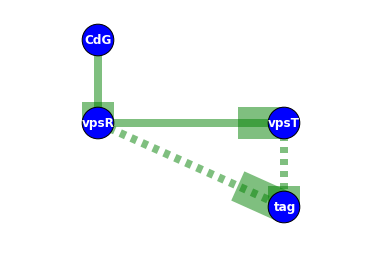

Figure 3b. The maximum level of tag expression in an And circuit is 2.48458825499 units


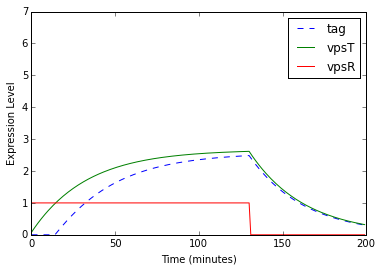

Figure 3c.  With the AND gate, MMS causes a ~ 3.0-fold decrease in growth at T=200.


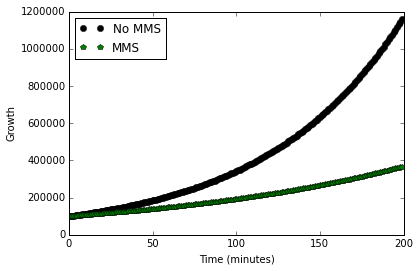

Figure 3d.  MMS reaches half its concentration after 100 minutes.


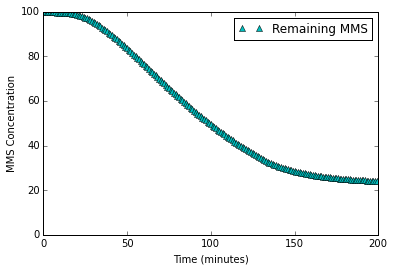

In [345]:
##AND Logic - How does the circut respond if both X (vpsR) and Y (vpsT) are needed above certain concentrations
    #to activate Z (tag)?
##Used to format figure legends below.
circuit='AND'

##Calling the networkx function DiGraph to make a directed graph called T
T=nx.DiGraph()

##Adding individual nodes to the graph at specific positions in an XY plane
T.add_node('CdG',pos=(0.75,6))
T.add_node('$vpsR$',pos=(0.75,3))
T.add_node('$vpsT$',pos=(1,3))
T.add_node('$tag$',pos=(1,.0005))

##creating a variable 'pos' that contains all the positions for the nodes in DiGraph T
pos=nx.get_node_attributes(T,'pos')


##Drawing the nodes for graph T with labels, blue color, size of 1000, and a minimum transparency (alpha = 1.0) 
nx.draw_networkx_nodes(T,pos,
                       nodelist=['CdG','$vpsR$','$vpsT$','$tag$'],
                       node_color='b',
                       node_size=1000,
                       label=True,
                   alpha=1.0)
##Drawing the edges for graph T.  Edgelist contains the information on which nodes are connected.  The edge line has a 
#width of 8.0, simi transparent and green.
nx.draw_networkx_edges(T,pos,
                       edgelist=[('CdG','$vpsR$'),('$vpsR$','$vpsT$')],
                       width=8,alpha=0.5,edge_color='g')
##Similar to above except these edges contain solid and dashed lines to indicate that both dashed edges are necessary for
#the output of the system.
nx.draw_networkx_edges(T,pos,
                       edgelist=[('$vpsR$','$tag$'),('$vpsT$','$tag$')],
                       width=8,alpha=0.5,edge_color='g',style='dashed')
##Creating a dictionary of lables for nodes
labels={}
labels['CdG']='CdG'
labels['$vpsR$']='vpsR'
labels['$vpsT$']='vpsT'
labels['$tag$']='tag'

##Draw the labels onto the graph T with certain features (font color/size, etc.)
nx.draw_networkx_labels(T,pos,labels,font_size=12,font_color='w',font_weight='bold')

##Since I made my positions in the XY plane, I have the option to display the axis with the graph.  Its 
#not necessary so I will turn the axis off and display only the nodes and edges.
print 'Figure 3a - Graph of the {0} gate.  Solid lines represent activation independent of other factors, dashed lines \
represent activation dependent on the presence of both factors.  Green lines indicate an activation step.'.format(circuit)
plt.axis('off')
plt.show() 



##Initialization for the expression functions
#inital starting conditions of Y and Z (vpsT and tag, respectively)
Y=Z=0.0

##I will be following the expression of genes as well as the concentration of the toxin (MMS) overtime, therefore,
#i made a list contains 4 lists: Graph[0]= X (c-di-GMP signal) output, Graph[1]= Z (tag) output, Graph[2]=Y (vpsT) output
# and Graph[3]=MMS concentration output.
Graph=[[],[],[],[]]

##Variables for the activation functions: dt = change in time, beta_y/z =basal rates of y and z expression
dt=.1
beta_Y=beta_Z=1.0
##rate of activation: Larger K = decreased rate, smaller K = increased rate
K_xy=.50
K_yz=K_xz=.50

#Turnover factor of Y and Z per iteration.
turnover = .30

## expression level of Y needed before Y can activate transcription
Y_threshold=1.0

##Steepness factor of the equation.  Higher H - the more the function resemebles a true step function.
H=2.0

##Using linspace to iterate 200 steps between the values 0 and 100.
T= linspace(0,100.0,200)

##Start and stop represent the times at which c-di-GMP is introduced and leaving the system, respectively.
start=0.0
stop=130.0

##Starting concentration MMS 
MMS=100.0

##Arbitraty constant of MMS 
K_mms=0.05

##For loop for the length of T = 200.
for t in range(len(T)):
    ##X (VpsR) can only exist in two states: Active (1.0) or Inactive (0.0) - its overall concentration never changes.  
    #If time is between the start and stop intervals, then X = 1.0, if not, then X = 0.0.
    if start <= t <= stop:
        x=1.0
        Graph[0].append(1.0)
        
        ##Change on Y (VpsT) by active X (VpsR).
        dy=((X_activate_Y(beta_Y,x,K_xy,H))-(y_TO(turnover,Y)))
       
        #a new Y value is generated by adding the change of Y (dY) multiplied by the dT factor to the existing Y value.
        Y=Y+(dy*dt)
        
        ##Add the value of the variable Y to Graph[2]
        Graph[2].append(Y)
       
        ##Y has a threshold value it needs to cross before it can act as an activator.  This if function determines whether or not
        #Y has crossed the threshold.  If so, then it activates the transcription/translation of Z.  If not, then Z is not expressed
        if Y >= Y_threshold:
            dz=((X_activate_Z(beta_Z,x,K_xz,H))*(Y_activate_Z(beta_Y,Y,K_yz,H)))-(z_TO(turnover,Z))
            Z=Z+(dz*dt)
            Graph[1].append(Z)
        else:
            Graph[1].append(0)
    
    
    
    ##When the c-di-GMP signal is gone, X is inactive (x=0.0)
    else:
        x=0.0
        Graph[0].append(0.0)
        
        ##These equations give the change in Y and Z overtime when x=0.0.  Essentially, they are just tracking the degradation 
        # of y and z.
        dy=((X_activate_Y(beta_Y,x,K_xy,H))-(y_TO(turnover,Y)))
        Y=Y+(dy*dt)
        Graph[2].append(Y)
        dz=((X_activate_Z(beta_Z,x,K_xz,H)*(Y_activate_Z(beta_Y,Y,K_yz,H)))-(z_TO(turnover,Z)))
        Z=Z+(dz*dt)
        Graph[1].append(Z)
    
    
    ##MMS degradation - tag works to decrease the concentration of MMS. In the absence of tag, MMS decays by some marginal rate.
    #In the presence of tag, MMS decay is proportional to the total level of tag expressed.
    if Graph[1][t] == 0:
        MMS=MMS-(.0005*MMS)
        Graph[3].append(MMS)
    else:
        MMS=MMS-(.005*Graph[1][t]*MMS)
        Graph[3].append(MMS)

        
##Determining the maximum value in the list Graph[1]
M_1=max(Graph[1])
print 'Figure 3b. The maximum level of tag expression in an And circuit is {0} units'.format((M_1))    

##Ploting all gene expression lists (Graph[1],Graph[2], and Graph[0])
plot(Graph[1],"--b")
plot(Graph[2],'g')
plot(Graph[0],'r')
plt.axis([0,200,0,7.0])
plt.xlabel('Time (minutes)')
plt.ylabel('Expression Level')
legend(['tag','vpsT','vpsR'])
figure()
show()

###Growth
#Initialization for the growth ODEs

uMax=.025
Ks=Kr=.0005
uEat=-.0007

##C[0] - starting concentration of bacteria, C[1] - starting concentration of nutrients
C0 = array([100000,100000]) 

##Calling the dC_dT functions for both the untreated and MMS treated populations of cells into the odeint function.
No_MMS = odeint(dC_dt,C0,T)
With_MMS = odeint(dC_dt_MMS,C0,T)
figure()
plot(No_MMS[:,0],'ok')  
plot(With_MMS[:,0],'gp')   
plt.xlabel('Time (minutes)')
plt.ylabel('Growth')
legend(['No MMS','MMS'],loc='upper left')
 
##Fold change in growth at T=200 between MMS treated and untreated populations
FoldChange=((No_MMS[len(T)-1,0])/(With_MMS[len(T)-1,0]))

#round function rounds a float number to point past the decimal.
if round(FoldChange) <= 1.0:
    print 'Figure 3c.  With the {0} gate, MMS does not cause a decrease in growth'.format(circuit)
else:
    print 'Figure 3c.  With the {0} gate, MMS causes a ~ {1}-fold decrease in growth at T=200.'.format(circuit,round(FoldChange))
show()



##Determing the time at which the MMS concentration is half the initial concentration.

#The maximum concentration of MMS = Starting MMS concentration
M_3=max(Graph[3])
mms_loss=[]
for t in range(len(T)):
    a=Graph[3][t]
    ##Once the MMS concentration decreases to half the starting concentration, add that time (t) to the list mms_loss.
    if a <= (.5*M_3):
        mms_loss.append(t)    
        
##If MMS never reaches 1/2 the starting concentration (mms_loss is empty ) - print below
if not mms_loss:
    print 'Figure 3d.  MMS did not reach half its concentration in the time allotted.'
##Else, print mms_loss[0], which contains the time at which the concentration of MMS first fell to half the starting concentration
else:
    print 'Figure 3d.  MMS reaches half its concentration after {0} minutes.'.format(mms_loss[0]) 
  



##Plotting the MMS turnover curve
plot(Graph[3],'c^',)
plt.axis([0,200,0,100])
plt.xlabel('Time (minutes)')
plt.ylabel('MMS Concentration')
legend(['Remaining MMS'])

 


Figure 4a - Graph of the OR gate.  Solid lines represent activation independent of other factors and  green lines indicate an activation step.


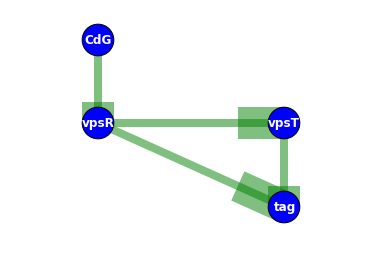

Figure 4b. The maximum level of tag expression in an OR circuit is 5.72307711861 units


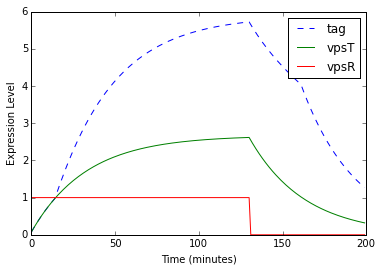

Figure 4c.  With the OR gate, MMS does not cause a decrease in growth.


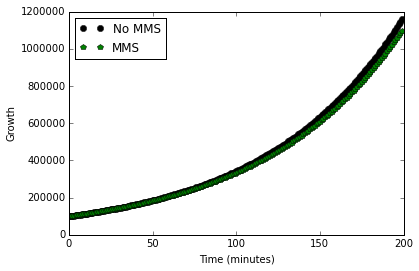

Figure 3d.  MMS reaches half its concentration after 57 minutes.


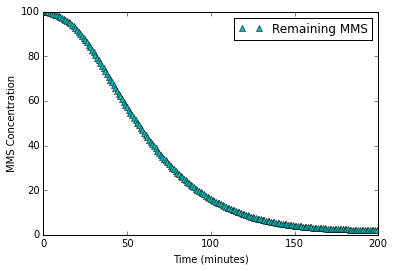

In [346]:
##OR


#Used for formating figure legends below
circuit = 'OR'

####Making the graph of the transcriptional motif

##Calling the networkx function DiGraph to make a directed graph called T
T=nx.DiGraph()

##Adding individual nodes to the graph at specific positions in an XY plane
T.add_node('CdG',pos=(0.75,6))
T.add_node('$vpsR$',pos=(0.75,3))
T.add_node('$vpsT$',pos=(1,3))
T.add_node('$tag$',pos=(1,.0005))

##creating a variable 'pos' that contains all the positions for the nodes in DiGraph T
pos=nx.get_node_attributes(T,'pos')


##Drawing the nodes for graph T with labels, blue color, size of 1000, and a minimum transparency (alpha = 1.0) 
nx.draw_networkx_nodes(T,pos,
                       nodelist=['CdG','$vpsR$','$vpsT$','$tag$'],
                       node_color='b',
                       node_size=1000,
                       label=True,
                   alpha=1.0)
##Drawing the edges for graph T.  Edgelist contains the information on which nodes are connected.  The edge line has a 
#width of 8.0, simi transparent and green.
nx.draw_networkx_edges(T,pos,
                       edgelist=[('CdG','$vpsR$'),('$vpsR$','$tag$'),('$vpsR$','$vpsT$'),('$vpsT$','$tag$')],
                       width=8,alpha=0.5,edge_color='g')

##Creating a dictionary of lables for nodes
labels={}
labels['CdG']='CdG'
labels['$vpsR$']='vpsR'
labels['$vpsT$']='vpsT'
labels['$tag$']='tag'

##Draw the labels onto the graph T with certain features (font color/size, etc.)
nx.draw_networkx_labels(T,pos,labels,font_size=12,font_color='w',font_weight='bold')

print 'Figure 4a - Graph of the {0} gate.  Solid lines represent activation independent of other factors and  \
green lines indicate an activation step.'.format(circuit)

##Since I made my positions in the XY plane, I have the option to display the axis with the graph.  Its 
#not necessary so I will turn the axis off and display only the nodes and edges.
plt.axis('off')
plt.show() 


##Initialization for the gene expression functions


#inital starting conditions of Y and Z (vpsT and tag, respectively)
Y=Z=0.0

##I will be following the expression of genes as well as the concentration of the toxin (MMS) overtime, therefore,
#i made a list contains 4 lists: Graph[0]= X (c-di-GMP signal) output, Graph[1]= Z (tag) output, Graph[2]=Y (vpsT) output
# and Graph[3]=MMS concentration output.
Graph=[[],[],[],[]]

##Variables for the activation functions: dt = change in time, beta_y/z =basal rates of y and z expression
dt=.1
beta_Y=beta_Z=1.0
##rate of activation: Larger K = decreased rate, smaller K = increased rate
K_xy=.50
K_yz=K_xz=.50

#Turnover factor of Y and Z per iteration.
turnover = .30

## expression level of Y needed before Y can activate transcription
Y_threshold=1.0

##Steepness factor of the equation.  Higher H - the more the function resemebles a true step function.
H=2.0

##Using linspace to iterate 200 steps between the values 0 and 100.
T= linspace(0,100.0,200)

##Start and stop represent the times at which c-di-GMP is introduced and leaving the system, respectively.
start=0.0
stop=130.0


##MMS variables

#Starting percentage of MMS 
MMS=100.0
#Arbitraty constant of MMS 
K_mms=0.05
#Basal decay rate of MMS
M_decay = .0005



##For loop for the length of T = 200.  This loop will populate the lists used to track and plot expression level of time T
for t in range(len(T)):
    ##X (VpsR) can only exist in two states: Active (1.0) or Inactive (0.0) - its overall concentration never changes.  
    #If time is between the start and stop intervals, then X = 1.0, if not, then X = 0.0.
    if start <= t <= stop:
        x=1.0
        Graph[0].append(1.0)
             
        ##Change on Y (VpsT) by active X (VpsR).
        dy=((X_activate_Y(beta_Y,x,K_xy,H))-(y_TO(turnover,Y)))
        Y=Y+(dy*dt)
        ##Add the value of the variable Y to Graph[2]
        Graph[2].append(Y)
        
        ##Y has a threshold value it needs to cross before it can act as an activator.  This if function determine whether or not
        #Y has crossed the threshold.  If so, then it activates the transcription/translation of Z.  If not, then Z is not expressed
        if Y >= Y_threshold:
            dz=((X_activate_Z(beta_Z,x,K_xz,H))+(Y_activate_Z(beta_Y,Y,K_yz,H)))-(z_TO(turnover,Z))
            Z=Z+(dz*dt)
            Graph[1].append(Z)
        else:
            dz=((X_activate_Z(beta_Z,x,K_xz,H)-(z_TO(turnover,Z))))
            Z=Z+(dz*dt)
            Graph[1].append(Z)
            
            
    else:
        x=0.0
        Graph[0].append(0.0)
        
        ##Change on Y (VpsT) by active X (VpsR).
        dy=((X_activate_Y(beta_Y,x,K_xy,H))-(y_TO(turnover,Y)))
        Y=Y+(dy*dt)
        Graph[2].append(Y)
        ##If Y > y_threshold, then the change of Z by Y is due to the activating function describing the effect of Y on Z
        #If Y < y_threshold, the change of Z is due to the turnover of the gene.
        if Y >= Y_threshold:
            dz=(Y_activate_Z(beta_Y,Y,K_yz,H))-(z_TO(turnover,Z))
            Z=Z+(dz*dt)
            Graph[1].append(Z)
        else:
            dz=-(z_TO(turnover,Z))
            Z=Z+(dz*dt)
            Graph[1].append(Z) 
            
            
    ##MMS degradation - tag works to decrease the concentration of MMS. In the absence of tag, MMS decays by some marginal rate.
    #In the presence of tag, MMS decay is proportional to the total level of tag expressed.
    if Graph[1][t] == 0:
        MMS=MMS-(M_decay*MMS)
        Graph[3].append(MMS)
    else:
        MMS=MMS-(M_decay*Graph[1][t]*10*MMS)
        Graph[3].append(MMS)
        

##Determining the maximum value in the list Graph[1]
M_1=max(Graph[1])
print 'Figure 4b. The maximum level of tag expression in an {0} circuit is {1} units'.format(circuit,M_1)    

##Ploting all gene expression lists (Graph[1] (Z = Tag) ,Graph[2] (Y = VpsT) , and Graph[0] (X = Active VpsR))
plot(Graph[1],"--b")
plot(Graph[2],'g')
plot(Graph[0],'r')
plt.xlabel('Time (minutes)')
plt.ylabel('Expression Level')
legend(['tag','vpsT','vpsR'])
figure()
show()

###Growth



#Initialization for the growth ODEs

##maximum growth rate
uMax=.025

##Ks is the concentration of nutrients when the growth rate is at half the maximum value
##Kr is the basal death rate
Ks=Kr=.0005

##uEat is the rate at which the bacteria consumes the nutrient source 
uEat=-.0007

##C[0] - starting concentration of bacteria, C[1] - starting concentration of nutrients
C0 = array([100000,100000]) 

##Calling the dC_dT functions for both the untreated and MMS treated populations of cells
No_MMS = odeint(dC_dt,C0,T)
With_MMS = odeint(dC_dt_MMS,C0,T)
figure()
plot(No_MMS[:,0],'ok')  
plot(With_MMS[:,0],'gp')   
plt.xlabel('Time (minutes)')
plt.ylabel('Growth')
legend(['No MMS','MMS'],loc='upper left')
 
##Fold change in growth at T=200 between MMS treated and untreated populations
FoldChange=((No_MMS[len(T)-1,0])/(With_MMS[len(T)-1,0]))
if round(FoldChange) <= 1.0:
    print 'Figure 4c.  With the {0} gate, MMS does not cause a decrease in growth.'.format(circuit)
else:
    print 'Figure 4c.  With the {0} gate, MMS causes a {1}-fold decrease in growth at T=200.'.format(circuit,round(FoldChange))
show()

 
##Determing the time at which the MMS concentration is half the initial concentration.

#The maximum concentration of MMS = Starting MMS concentration
M_3=max(Graph[3])
mms_loss=[]
for t in range(len(T)):
    a=Graph[3][t]
    ##Once the MMS concentration decreases to half the starting concentration, add that time (t) to the list mms_loss.
    if a <= (.5*M_3):
        mms_loss.append(t)    
        
##If MMS never reaches 1/2 the starting concentration (mms_loss is empty ) - print below
if not mms_loss:
    print 'Figure 3d.  MMS did not reach half its concentration in the time allotted.'
##Else, print mms_loss[0], which contains the time at which the concentration of MMS first fell to half the starting concentration
else:
    print 'Figure 3d.  MMS reaches half its concentration after {0} minutes.'.format(mms_loss[0]) 
  
    
##Plotting the MMS turnover curve
plot(Graph[3],'c^',)
plt.axis([0,200,0,100])
plt.xlabel('Time (minutes)')
plt.ylabel('MMS Concentration')
legend(['Remaining MMS'])

# Conclusions

       There were three goals for the project: 1) model the expression level of tag under the control of two separate logic gates, 2) model the effects on cell growth in the presence of MMS with a population of cells utilizing the OR logic gate or the AND logic gate, and 3) determine which logic gate provided better protection against the deleterious effects of MMS.
        With identical paramenters (rates of activation, Y-threshold, turnover rates, and basal expression rates), the synergistic OR gate had the higher maximum expression level compared to the AND gate(Figure 3b and 4b, 2.5 for the AND gate and 5.7 for the OR gate).  The OR gate also had a faster rate of expression, as it reached the AND gate maximum expression level (2.5) after ~25 minutes.  Further, in the absence of the signal input CdG, Tag product was retained longer due to the fact that VpsT was still above the threshold (Figure 4a, after the red line drops to 0).  This was not the case for the AND logic gate, where Tag was degraded immediately after the sinal input CdG was removed (Figure 3a, after the red line drops to 0.)
        Growth was modeled using variations of the Monod kinetic model of bacterial growth dependent on one growth substrate.  MMS inhibits replication and causes cell death, therefore MMS was factored in to the death rate of the equation where the concentration of MMS directly increased the death rate of the population.  The MMS concentration was dependent on a basal decay rate (M_decay) and the population expression level of tag: increased tag expression level causes a porportional decrease in MMS.  In agreement with the expression level data from Figures 3b and 4b, the population utilizing the OR logic gate was able to turnover MMS quicker than the population utilizing the AND logic gate (Figure 4d, 57 minutes to reach half the starting MMS concentration.  Figure 3d, 100 minutes to reach half the starting MMS concentration.)  The quick MMS turnover positively effected the growth of the population utlizing the OR gate logic when growing in the presence of MMS, as there was no difference between the final growth levels between treated and untreated populations.  However, this was not the case for the populations utilizing the AND gate logic.  When challeneged with MMS, this population of cells grew to a final level that was approximately 3X less than the untreated AND population and the treated OR population (Figure 3c and 4c, compare green pentagons with black circles).
    Together, the data generated by the model supports the initial hypothesis that the synergistic OR gate supplies the GRN with a robust output in a short amount of time, which would benefit organisms utilizing this type of transcriptional motif to regulate genes that play a role in defending against stressors or competitors. 